# به نام خداوند بخشاینده مهربان


### تجزیه و تحلیل گراف شبکه همکاری آکادمیک با محوریت شناسایی انجمن های نهان

با استفاده از پایتون و نتورک ایکس

محمد حیدری

www.bigdataworld.ir

m_heydari@modares.ac.ir
moh.heydari@mail.sbu.ac.ir
heydari.mohammad8@gmail.com

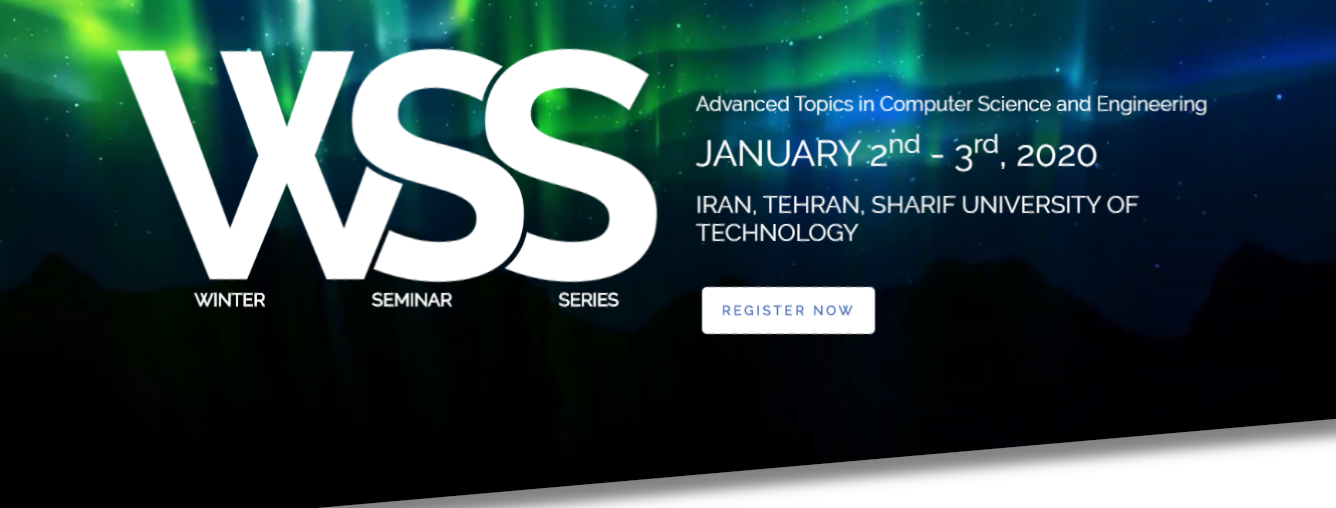

نصب کتابخانه نتورک ایکس

In [ ]:
#pip install networkx

نسخه نتورک ایکس

In [254]:
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.2


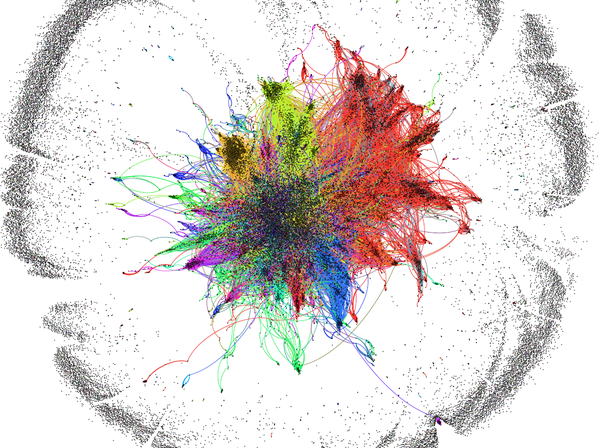

In [265]:
from IPython.display import Image

## ایمپورت کتابخانه های ضروری

In [232]:
import collections
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms.community import k_clique_communities, girvan_newman
from networkx.algorithms import community
import community
import numpy as np
import pandas as pd
import scipy.spatial as spt
%matplotlib inline

from networkx.algorithms import bipartite

##  آپلود فایل دیتاست در صورتی که بخواهیم در (کُلَب) کار کنیم

In [ ]:
from google.colab import files
up = files.upload()

## خواندن فایل دیتاست و ساخت دیتافریم

In [29]:
df = pd.read_excel('the_data.xlsx', columns= ['source', 'target'])

## محتوی دیتافریم

In [31]:
df.head()

source                              target
0  Tehran University of Medical Science                University of Tehran
1  Tehran University of Medical Science          Tarbiat Modares university
2                  University of Tehran  Amirkabir University of Technology
3                  University of Tehran                                IAU 
4            Tarbiat Modares university          Tarbiat Modares university

## ساخت گراف

In [30]:
g = nx.from_pandas_edgelist(df,'source','target')

## اطلاعات ساختاری گراف

## میانگین درجه

### هر گره به طور میانگین با چند گره دیگر در ارتباط است

In [181]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 183
Number of edges: 320
Average degree:   3.4973


## نظریه 6 درجه جدایی

In [198]:
print(nx.diameter(g))

7


## بررسی همبندبودن شبکه

In [204]:
print(nx.is_connected(g))

True


## نمایش نودهای گراف

In [184]:
g.nodes

NodeView(('Tehran University of Medical Science', 'University of Tehran', 'Tarbiat Modares university', 'Amirkabir University of Technology', 'IAU ', 'Isfahan University of Technology', 'Iran University of Science and Technology', 'University of Applied Science and Technology', 'Ferdowsi University of Mashhad', 'Mashhad University of Medical Sciences', 'Shiraz University', 'University of Guilan', 'Tabriz University of Medical Sciences', 'University of Tabriz', 'Shahid Beheshti University', 'University of Isfahan', 'Isfahan University of Medical Sciences', 'Shahid Beheshti University of Medical Sciences and Health Services', 'Iran University of Medical Sciences', 'Sharif University of Technology', 'Shiraz University of Medical Sciences', 'Shahid Rajaee Teacher Training University', "Allameh Tabataba'i University", 'Urmia University', 'Yazd University', 'Shahid Sadoughi University of Medical Sciences', 'Semnan University', 'Semnan University of Medical Sciences', 'Shahid Chamran Universi

## نمایش یال های گراف

In [182]:
g.edges

EdgeView([('Tehran University of Medical Science', 'University of Tehran'), ('Tehran University of Medical Science', 'Tarbiat Modares university'), ('Tehran University of Medical Science', 'Shahid Beheshti University of Medical Sciences and Health Services'), ('Tehran University of Medical Science', 'Iran University of Medical Sciences'), ('Tehran University of Medical Science', 'Isfahan University of Medical Sciences'), ('Tehran University of Medical Science', 'Shiraz University of Medical Sciences'), ('Tehran University of Medical Science', 'Mashhad University of Medical Sciences'), ('Tehran University of Medical Science', 'Shahid Sadoughi University of Medical Sciences'), ('Tehran University of Medical Science', 'Semnan University of Medical Sciences'), ('Tehran University of Medical Science', 'Ahvaz Jundishapur University of Medical Sciences'), ('Tehran University of Medical Science', 'Ardabil University of Medical Sciences'), ('Tehran University of Medical Science', 'Kerman Univer

# گره با بیشترین درجه در گراف

In [201]:
deg = dict(g.degree())
maxDeg = max(degrees.values())
maxDegKey = [i for i in degrees.keys() if degrees[i] == maxDeg]
print(maxDeg)
print(maxDegKey)

66
['IAU ']


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


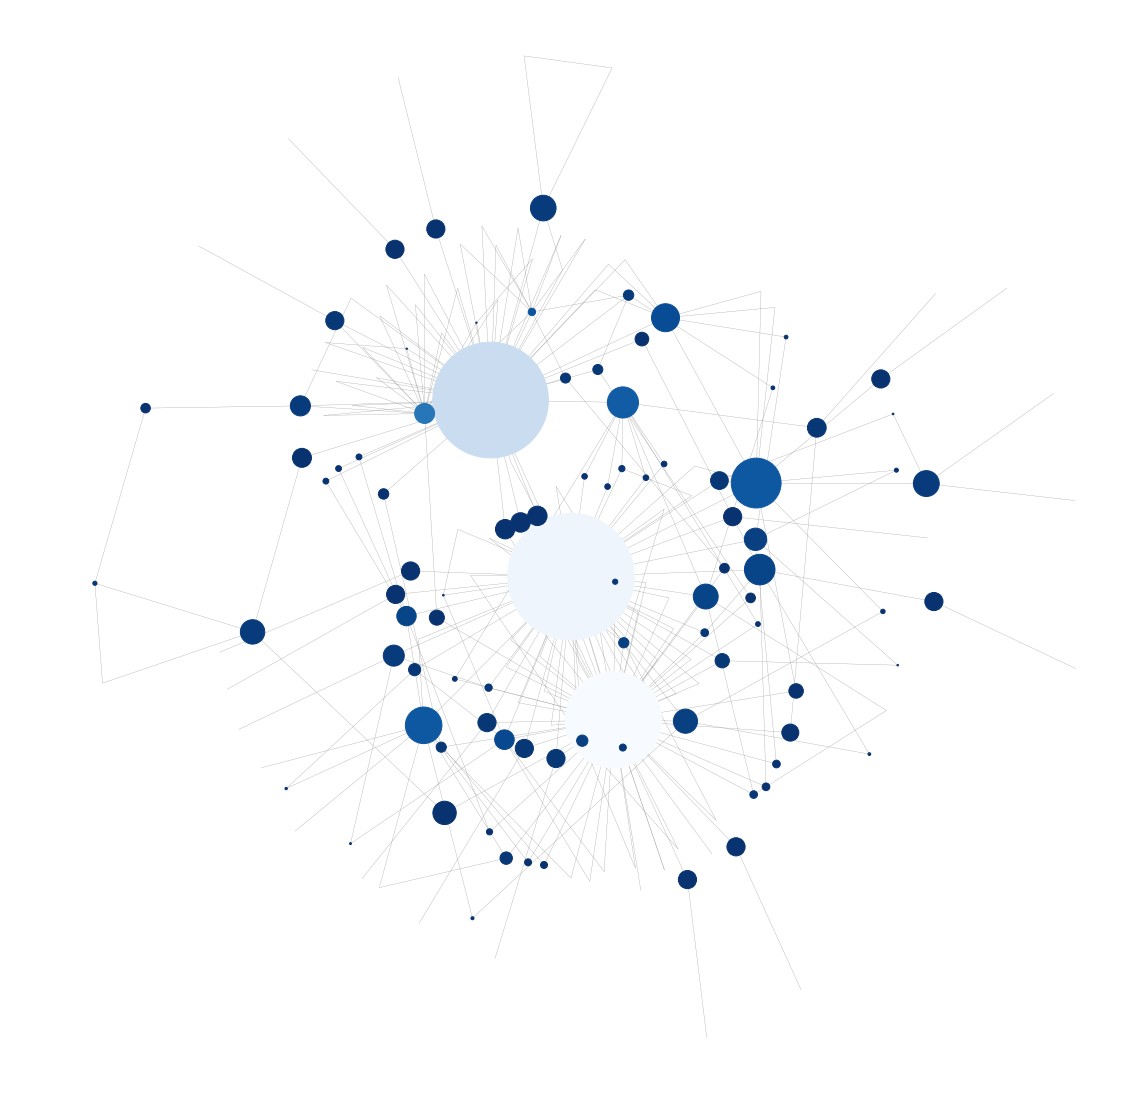

In [203]:
plt.figure(figsize = (15,15))

pos = nx.kamada_kawai_layout(g)
node_colors = [ g.degree(n) for n in g ]
node_size = [30000*nx.betweenness_centrality(g)[n] for n in g]
nx.draw(g,pos = pos,node_color=node_colors, node_size=node_size,with_label = False,
                edge_color='0.6',alpha = 1,width = 0.3, cmap = plt.cm.Blues_r )

plt.axis('off')
#plt.tight_layout()
plt.show()

## شناسایی گره های کلیدی و حیاتی در گراف با تکیه بر تئوری مرکزیت در شبکه

 نحوه اتصال یک نود به نودهای دیگر در یک شبکه اجتماعی میتواند اطلاعاتی راجع به مهم بودن و یا مهم نبودن آن نود در کاربردهای خاص مشخص نماید
###
مثال میتوانیم مشخص کنیم کدام نود در انتشار شایعه بیشترین تاثیر را در یک شبکه اجتماعی دارد
###
بینابینی یک نود خاص در شبکه عبارت است از تعداد کوتاهترین مسیرهای میان نودهای شبکه که از یک نود خاص رد میشوند
###
در حقیقت این معیار محاسبه میکند چه تعداد از نودهای شبکه برای ارتباط سریعتر با هم (با واسطه کمتر) به این نود نیاز دارند
### 
هر چه بینابینی نود زیادتر باشد یعنی اینکه نود در مکان استراتژیک تری قرار گرفته است
###
نزدیکی عبارت است از عکس متوسط فاصله یک نود تا نودهای دیگر گراف
### 
نودی که دارای بیشترین مقدار نزدیکی است سرعت دسترسی بیشتری به نودهای دیگر دارد و
###
میتواند در مدت زمان کمی به همه نودها اطلاعات ارسال نماید  یا از آنها اطلاعات بگیرد

In [217]:
degCent = nx.degree_centrality(g)
closeCent = nx.closeness_centrality(g)
betCent = nx.betweenness_centrality(g)
pageCent  = nx.pagerank(g)

# یک تابع تعریف می کنیم که معیارهای مرکزیت به دست آمده را به صورت مرتب شده به ما بازگرداند
def impNodes(centrality,n = 5):
    sortedCent = sorted(centrality.items(), key=lambda x:x[1], reverse=True)[:n]
    return sortedCent

print('مرکزیت درجه')
pprint(impNodes(degCent))
print('\n')

print('مرکزیت نزدیکی')
pprint(impNodes(closeCent))
print('\n')

print('مرکزیت بینابینی')
pprint(impNodes(betCent))
print('\n')

print('مرکزیت پیج رنک')
pprint(impNodes(pageCent))
print('\n')

مرکزیت درجه
[('IAU ', 0.3626373626373627),
 ('University of Tehran', 0.3461538461538462),
 ('Tehran University of Medical Science', 0.2802197802197802),
 ('Shahid Beheshti University of Medical Sciences and Health Services',
  0.1043956043956044),
 ('Tarbiat Modares university', 0.06593406593406594)]


مرکزیت نزدیکی
[('University of Tehran', 0.5669781931464174),
 ('Tehran University of Medical Science', 0.49056603773584906),
 ('IAU ', 0.4827586206896552),
 ('Atomic Energy Organization of Iran', 0.4126984126984127),
 ('Imam Khomeini International University', 0.40176600441501104)]


مرکزیت بینابینی
[('University of Tehran', 0.5328671986210572),
 ('Tehran University of Medical Science', 0.44573932647555525),
 ('IAU ', 0.3082803670789112),
 ('Ferdowsi University of Mashhad', 0.08267370607855802),
 ('University of Tabriz', 0.044545310686960694)]


مرکزیت پیج رنک
[('IAU ', 0.09131715448812476),
 ('University of Tehran', 0.08584797462609024),
 ('Tehran University of Medical Science', 0.07030

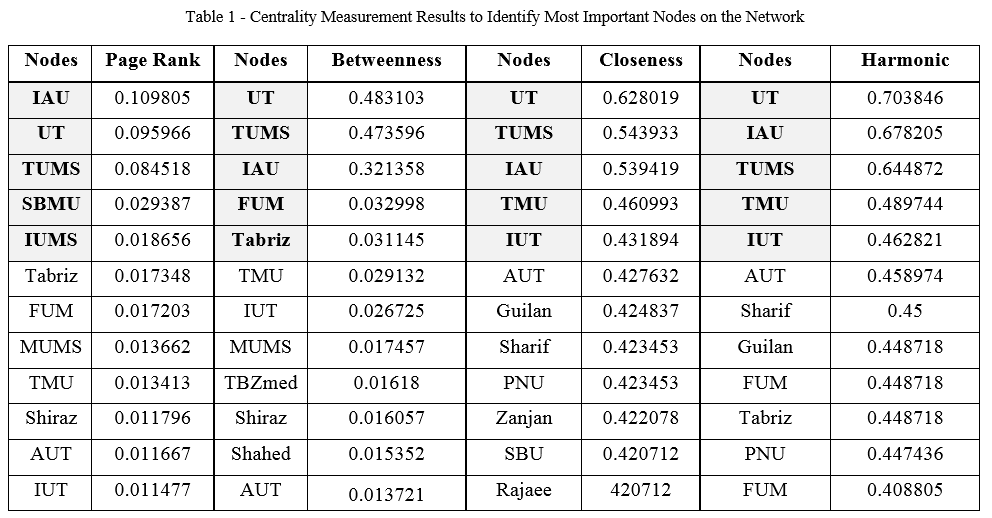

In [222]:
import seaborn as sns

In [252]:
centrality_measures = {
    'degree': degCent,
    'betweenness': betCent,
    'closeness': closeCent,
    'page Rank' : pageCent
}
centrality = pd.DataFrame(centrality_measures)


## جدول مرکزیت ها

In [251]:
centrality.head()

degree  betweenness  \
Academic Center for Education, Culture and Rese...  0.010989     0.000000   
Ahvaz Jundishapur University of Medical Sciences    0.016484     0.003333   
Alborza University of Medical Science               0.010989     0.000000   
Aliabad Katoul IAU                                  0.010989     0.010989   
Allameh Tabataba'i University                       0.010989     0.000000   

                                                    closeness  page Rank  
Academic Center for Education, Culture and Rese...   0.331512   0.003437  
Ahvaz Jundishapur University of Medical Sciences     0.346667   0.004557  
Alborza University of Medical Science                0.330309   0.003160  
Aliabad Katoul IAU                                   0.327338   0.004216  
Allameh Tabataba'i University                        0.392241   0.003155

پیرپلات، نوعی نمودار توزیعی است که
اساساً به رسم یک نمودار مشترک برای کلیه ی ترکیبات ممکن ستون های عددی و بولی در دیتاست شما می پردازد

ما فقط باید دیتافریم خود را به عنوان پارامتربه تابع پیرپلات ارسال کنیم

با استفاده از این نمودار می توان گفت که آیا داده ها بطور عادی توزیع می شود یا خیر

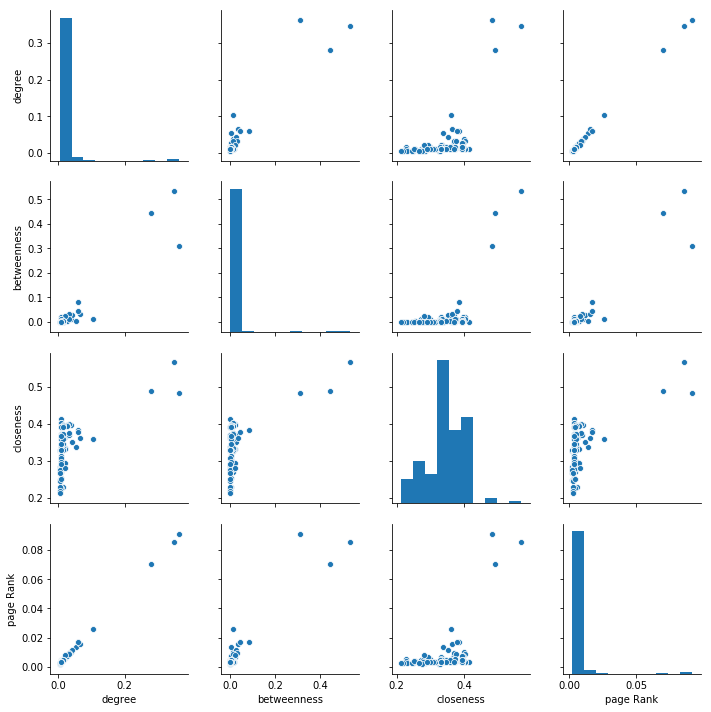

In [230]:
sns.pairplot(centrality)

## پیش بینی پیوند
## در آینده احتمال دارد کدام یک از دو دانشگاه با هم ارتباط برقرار کنند؟

روش جاکارد
 تعداد همسایه های مشترک دو گره / تعداد کل همسایه هاشون 

In [219]:
#یک تابع تعریف می کنیم که محتمل ترین پیوند های پیشبینی شده رو  برای ما چاپ می کنه
def topSimLink(pred, n = 5):
    pred_dict={}
    #s = source, t = target
    for s,t, p in pred:
        pred_dict[(s,t)] = p
    # دیکشنری به دست آمده رو  مرتب می کنیم تا ببینیم احتمال تشکیل کدام یک از لینک ها در شبکه بیشتره
    pprint( sorted(pred_dict.items(), key = lambda x:x[1], reverse=True)[:n]    )

# تابع زیر ضریب ژاکارد برای همه  جفت گره هایی در شبکه که با هم متصل نیستند رو محاسبه می کنه
jaccard = nx.jaccard_coefficient(g)
# تبدیل به دیکشنری می کنم

topSimLink(jaccard)

[(('University of Kurdistan ', 'University of Kashan'), 1.0),
 (('University of Kurdistan ', 'University of Qom'), 1.0),
 (('University of Kurdistan ', 'Shahid Beheshti University'), 1.0),
 (('University of Kurdistan ', 'IAU Tehran North Branch '), 1.0),
 (('University of Kurdistan ', 'Malek-Ashtar University of Technology'), 1.0)]


روش اتصال ترجیحی (Preferential Attachment)

توضیح مدل: گره هایی که همسایه های بیشتری دارند در آینده نیز به گره های بیشتری متصل می شوند
###
ایده: ثروتمندان ثروتمندتر می شوند
###
ایده اصلی: اگر دو گره دارای درجه بالایی باشند احتمال بالاتری وجود دارد که به هم متصل شوند
###
معیار: ضرب درجه دو گره با هم

In [221]:
prefAtt = nx.preferential_attachment(g)
topSimLink(prefAtt)

[(('Tehran University of Medical Science', 'IAU '), 3366),
 (('IAU ',
   'Shahid Beheshti University of Medical Sciences and Health Services'),
  1254),
 (('University of Tehran',
   'Shahid Beheshti University of Medical Sciences and Health Services'),
  1197),
 (('IAU ', 'Tarbiat Modares university'), 792),
 (('University of Tehran', 'Tarbiat Modares university'), 756)]


## نصب کتابخانه لُوین به منظور تشخیص اجتماع

In [1]:
# برای نصب این کتابخونه می تونید کد زیر رو اجرا کنید
!pip install python-louvain

  Stored in directory: C:\Users\Administrator\AppData\Local\pip\Cache\wheels\f9\74\a9\14f051b00dddd46d71529db15507796da13a43ee2c0bc39def
Successfully built python-louvain


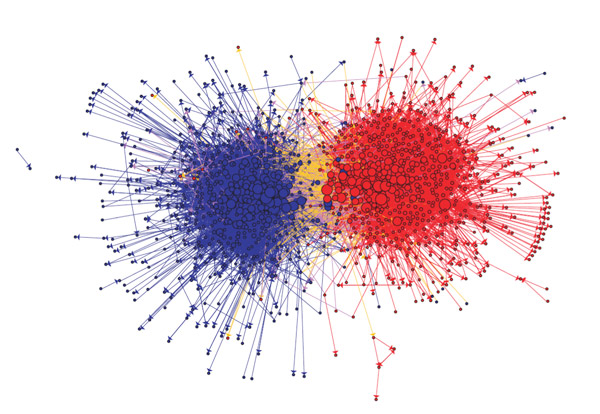

# معیار ماژولاریتی

# الگوریتم لوین

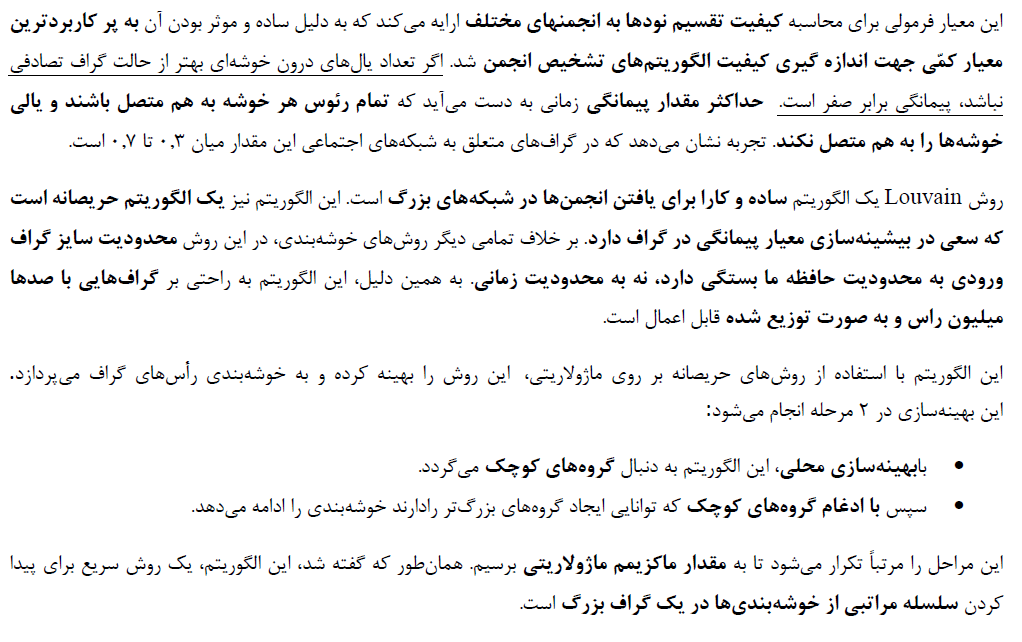

# تشریح عملکرد الگوریتم

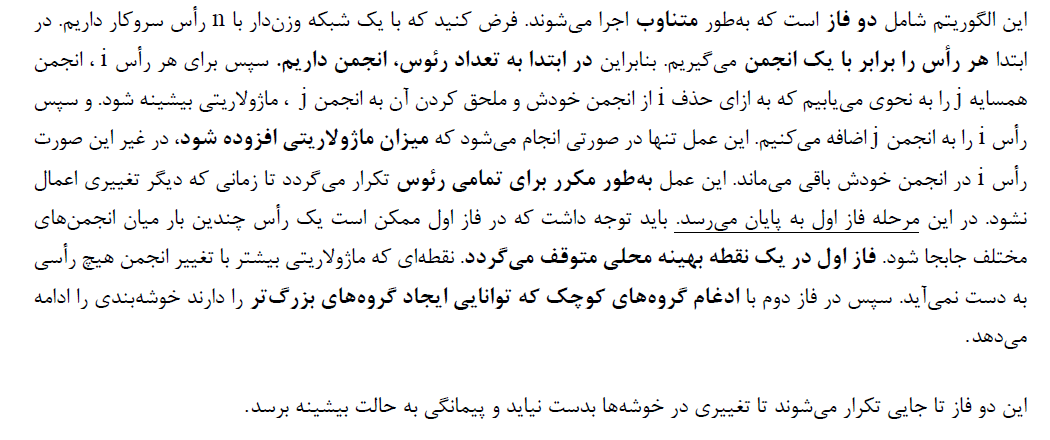

هر تکرار از دو فاز تشکیل شده است

فاز اول) بیشینه کردن پیمانگی به طور محلی با جابجایی رئوس در خوشه‌ها
   
فاز دوم) ساخت خوشه‌های بدست آمده در فاز قبلی و تولید شبکه جدید

دوفاز به طور متناوب تکرار می‌شوند تا جایی که دیگر افزایشی در پیمانگی رخ ندهد.

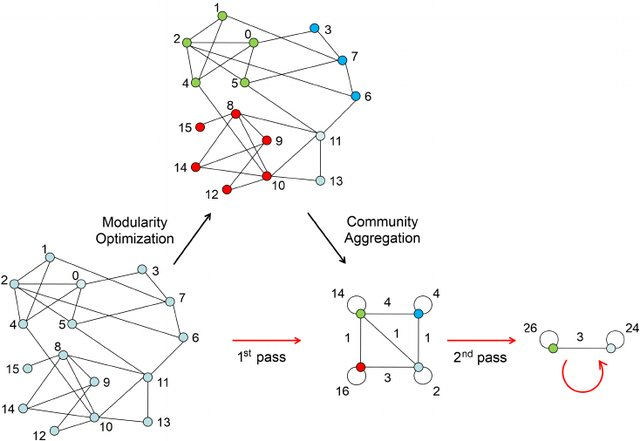

## تشخیص اجتماع

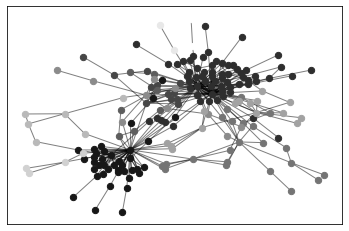

In [0]:
#first compute the best partition
%matplotlib inline
partition = community.best_partition(g)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(g)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(g, pos, list_nodes, node_size = 40,
                                node_color = str(count / size))

#plt.figure(figsize=(12,12))
#plt.figure(figsize=(20,15))
#plt.figure(3,figsize=(12,12))
nx.draw_networkx_edges(g, pos, alpha=0.5)
plt.savefig("d:Community1.png")
plt.show()

## نمایش الگوهای مصورسازی در نتورک ایکس

In [188]:
[patterns for patterns in nx.__dir__() if patterns.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'fruchterman_reingold_layout']

## مصورسازی اولیه گراف

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


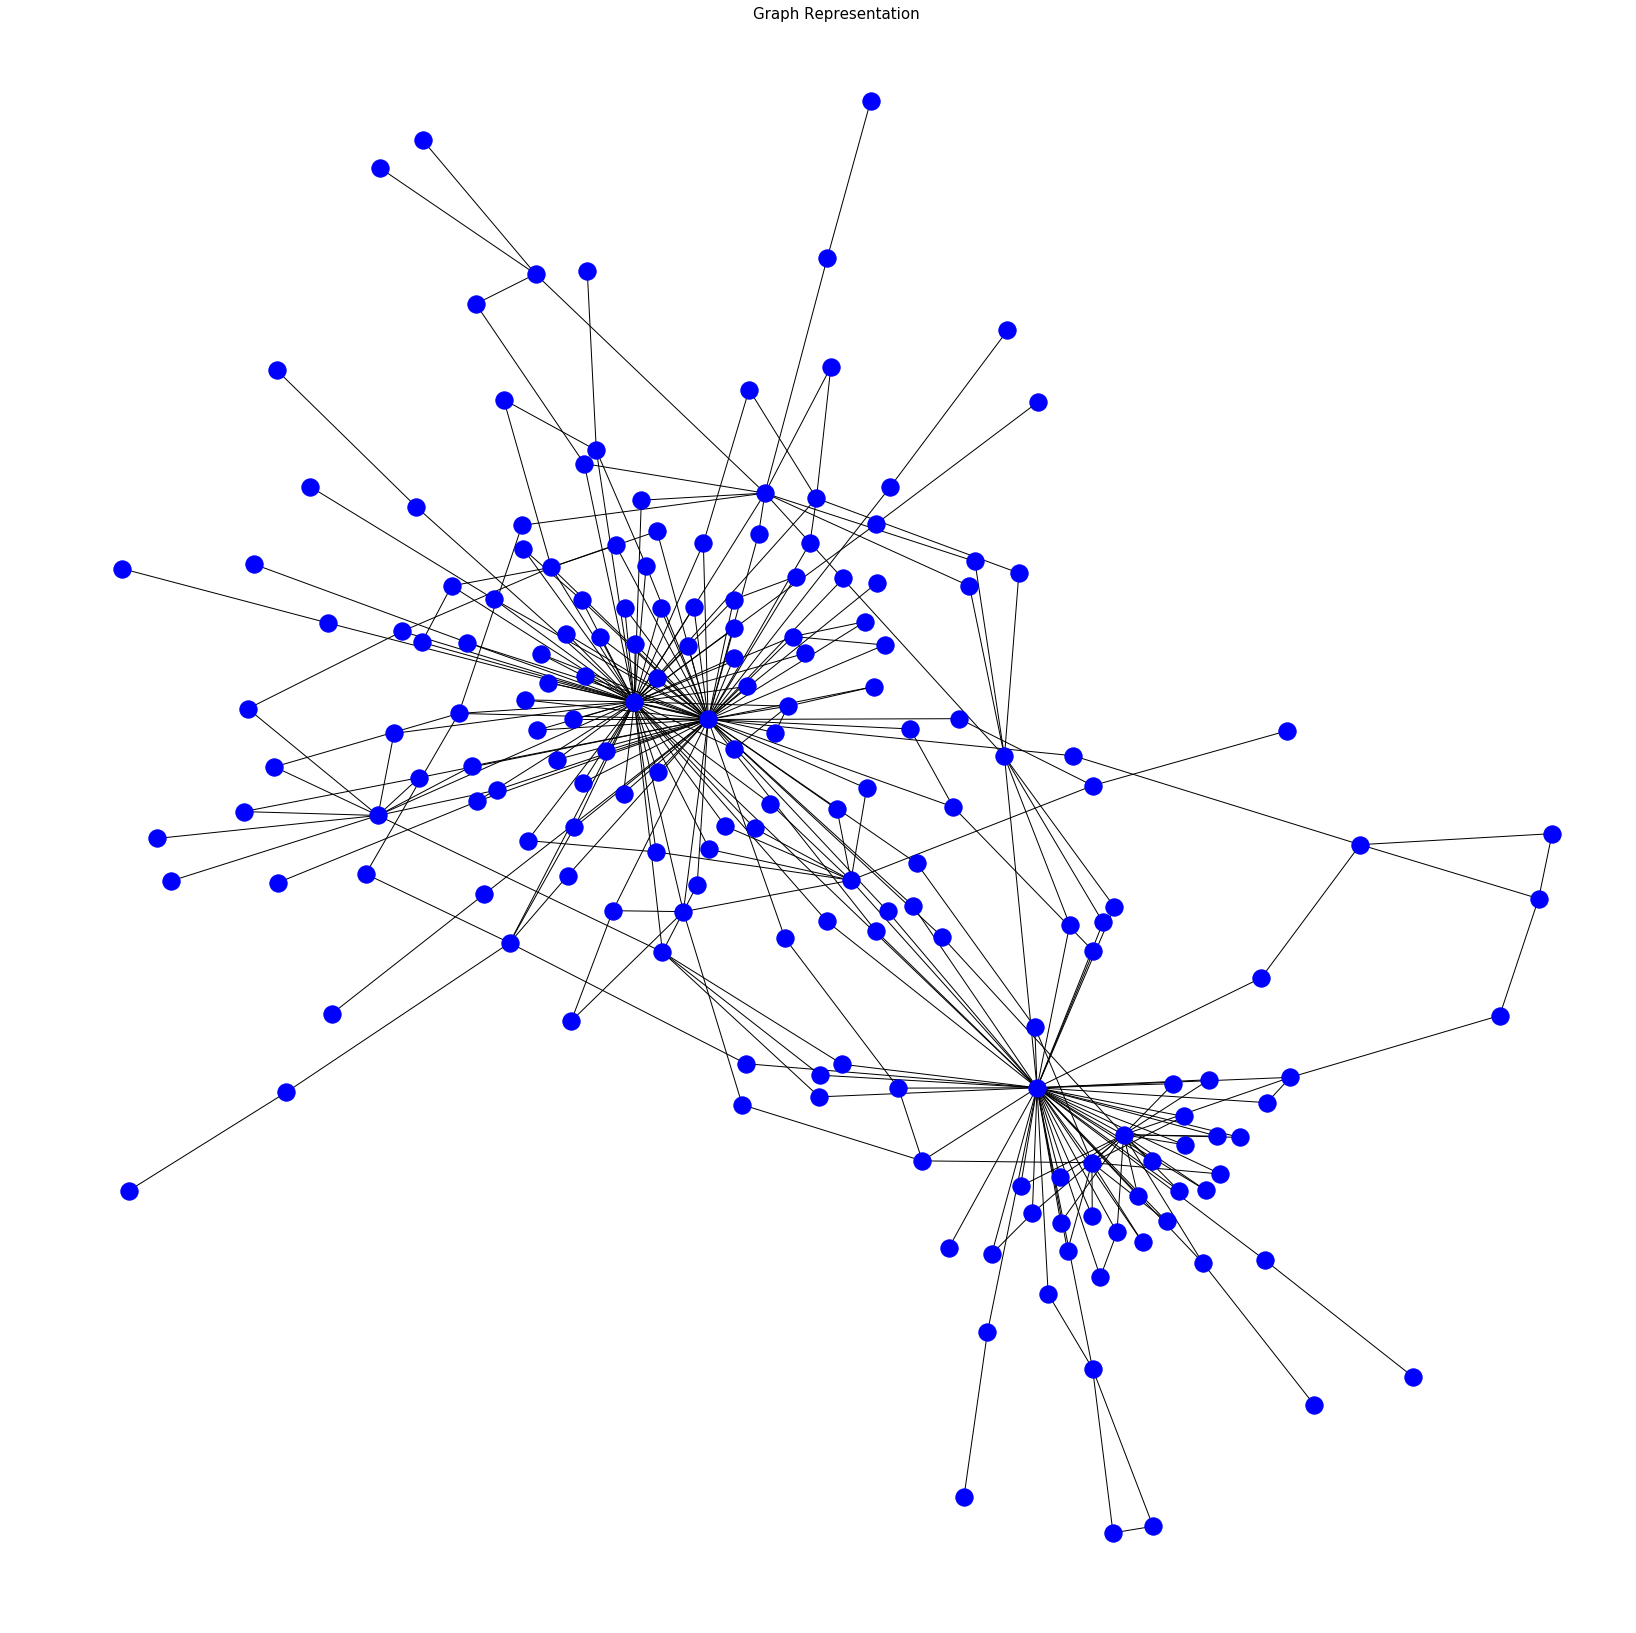

In [214]:
plt.figure(figsize=(22, 22))

plt.savefig("Viz1.png")
nx.draw(g,node_color='blue')
plt.title('Graph Representation', size=15)
plt.show()

## مصورسازی هیستوگرام توزیع درجات گراف در شبکه و تشخیص اجتماع

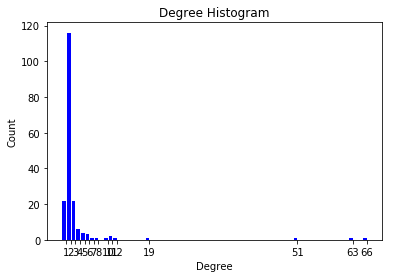

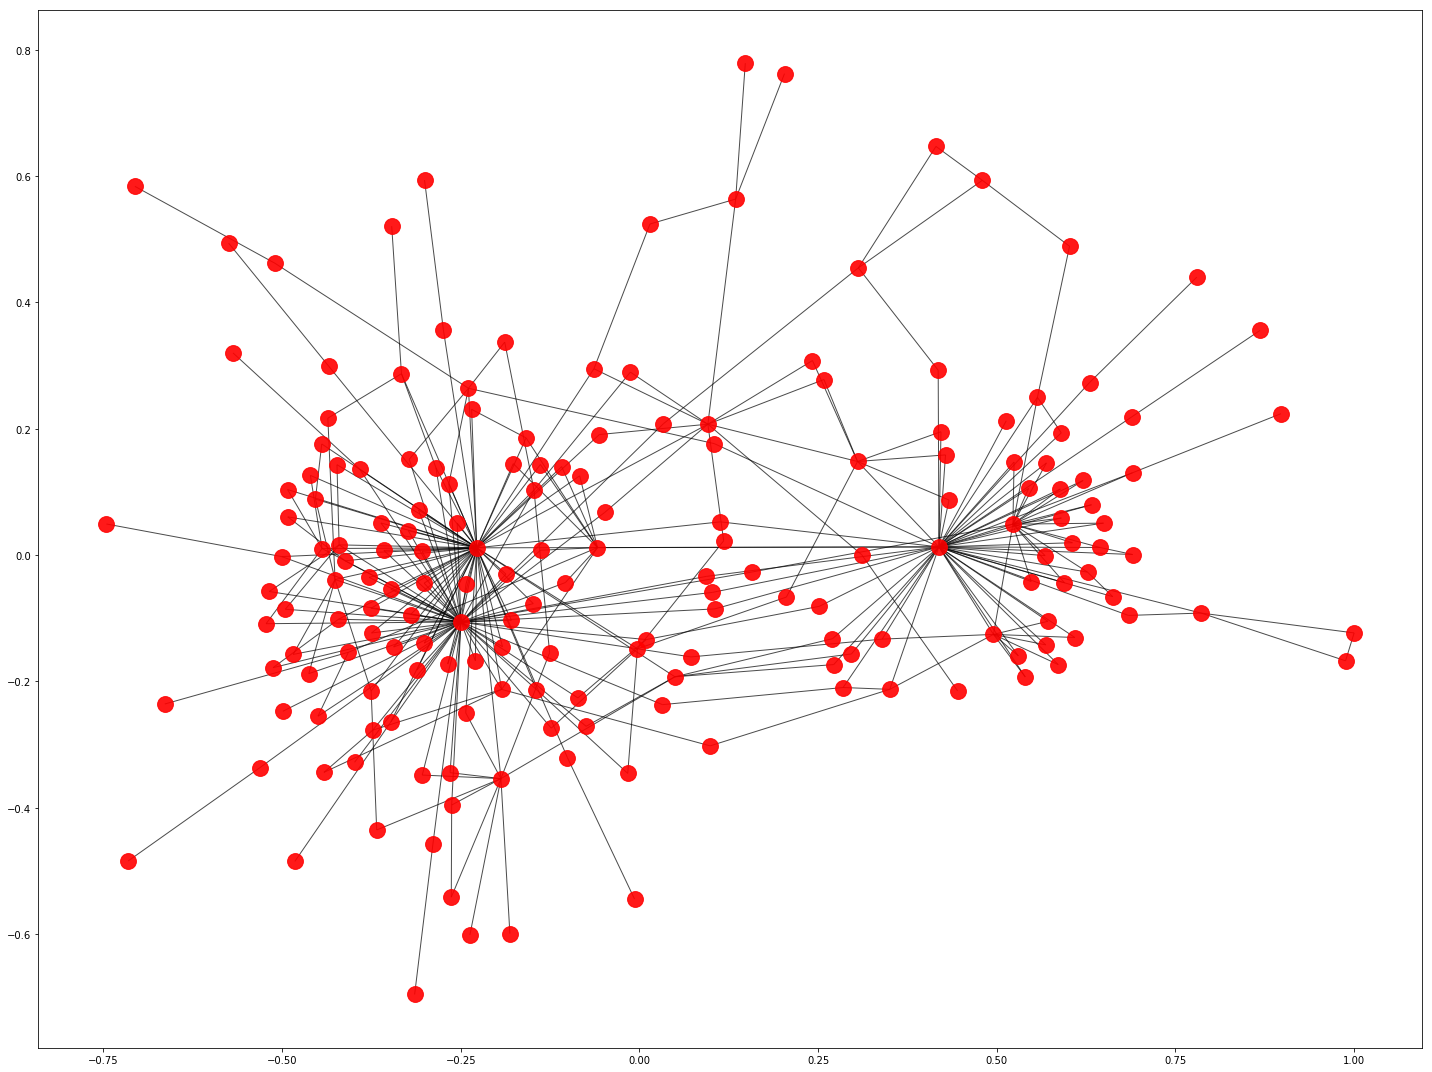

In [44]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
#Gcc = sorted(nx.connected_component_subgraphs(g), key=len, reverse=True)[0]
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)[0]
pos = nx.spring_layout(g)

plt.axis('off')
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
nx.draw_networkx_nodes(g, pos, node_size= 250, alpha=0.9)
nx.draw_networkx_edges(g, pos, alpha=0.7)
#plt.figure(figsize=(20,10))
plt.savefig("Hist.png")
plt.tight_layout()
plt.show()

## مصورسازی دوار گراف

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


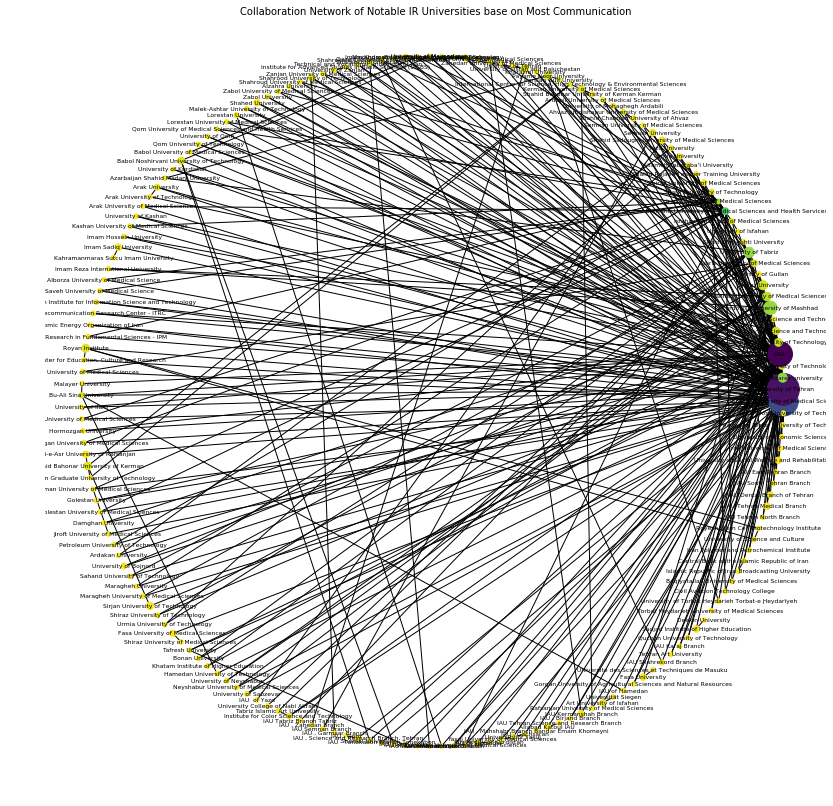

In [196]:
pos = nx.circular_layout(g)
betCent = nx.betweenness_centrality(g, normalized=True, endpoints=True)
node_color = [-10 * g.degree(v) for v in g] #node color refers to degree centrality
node_size =  [v * 1900 for v in betCent.values()] #node size refers to betweenness centrality
plt.figure(figsize=(14,14))
nx.draw_networkx(g, pos=pos,
                 node_color=node_color,
                 node_size=node_size, with_labels = True, font_size = 6)

plt.savefig("graph_Circular.png")

plt.axis('off')
plt.title('Collaboration Network of Notable IR Universities base on Most Communication', size = 10)
plt.show('Graph')

## مصورسازی گراف با محوریت نمایش گره ها با بیشترین مرکزیت بینابینی

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


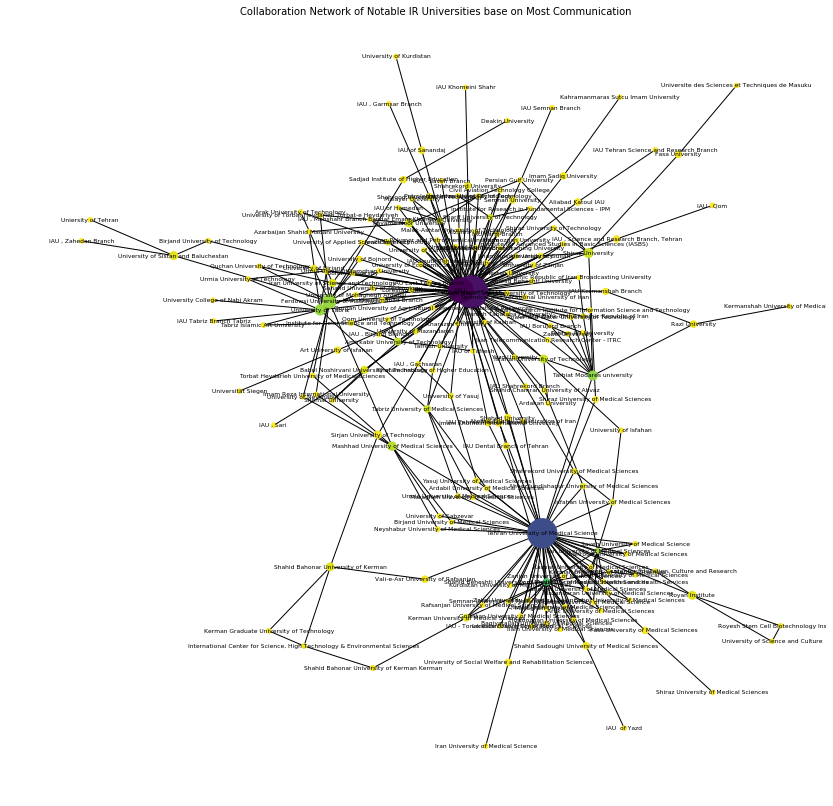

In [197]:
pos = nx.spring_layout(g)
betCent = nx.betweenness_centrality(g, normalized=True, endpoints=True)
node_color = [-10 * g.degree(v) for v in g] #node color refers to degree centrality
node_size =  [v * 1900 for v in betCent.values()] #node size refers to betweenness centrality
plt.figure(figsize=(14,14))
nx.draw_networkx(g, pos=pos,
                 node_color=node_color,
                 node_size=node_size, with_labels = True, font_size = 6)


plt.savefig("graph_Spring_Bet.png")

plt.axis('off')
plt.title('Collaboration Network of Notable IR Universities base on Most Communication', size = 10)
plt.show('Graph')

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


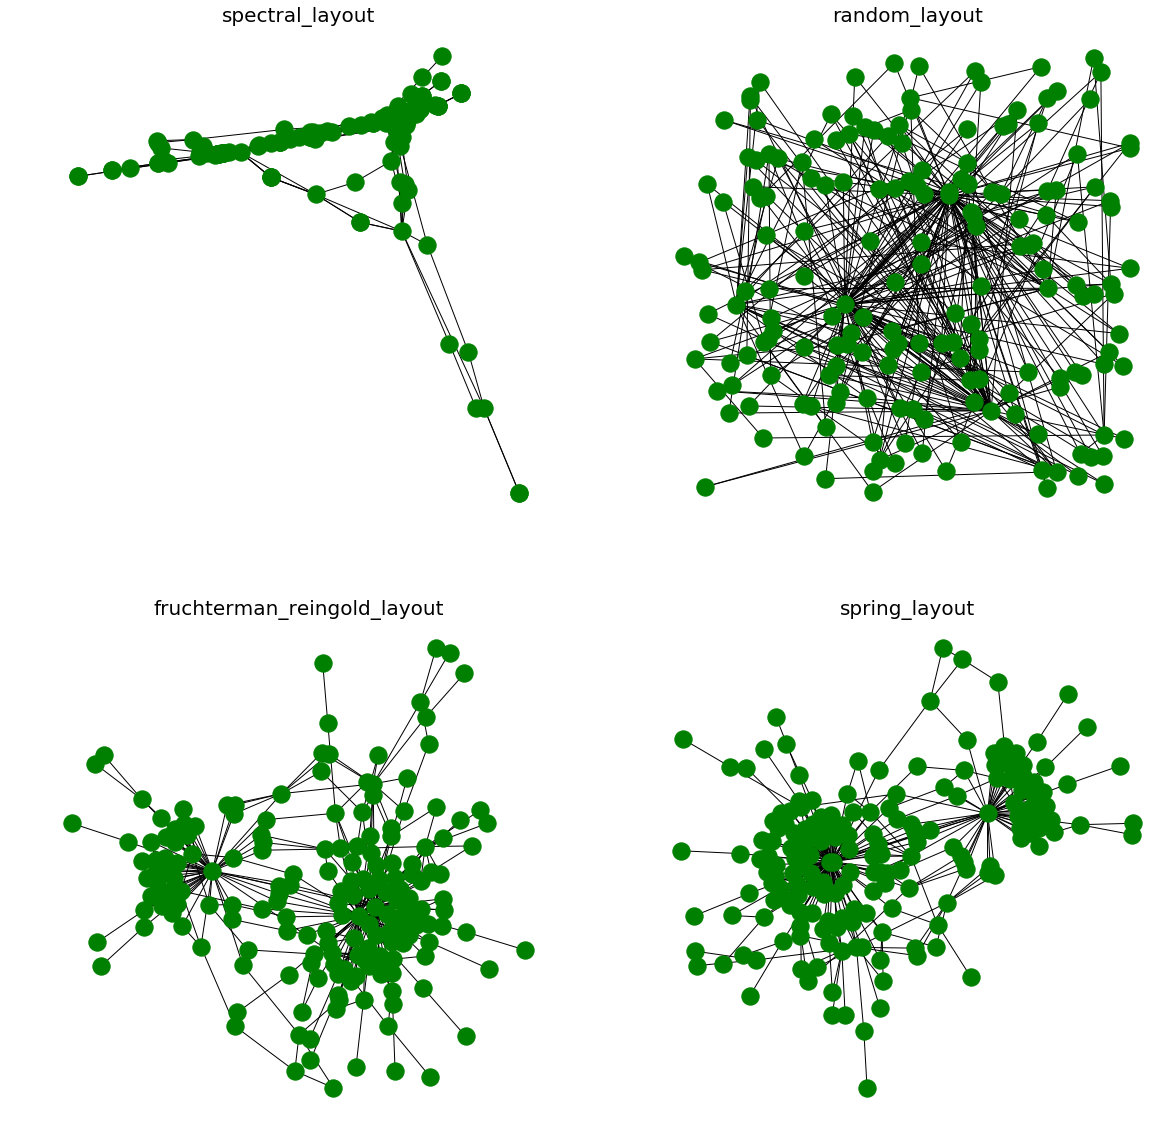

In [298]:
poses = [nx.spectral_layout(g),nx.random_layout(g),nx.spring_layout(g), nx.fruchterman_reingold_layout(g)]
titles = ['spectral_layout','random_layout','fruchterman_reingold_layout','spring_layout']
fig = plt.figure(figsize = (20,20))
for i in range(0,4):
    fig.add_subplot(2,2,i+1)
    node_colors = [ g.degree(n)*10 for n in g ]
    nx.draw(g, pos = poses[i], node_color='green')
    plt.title(titles[i],fontsize=20)
    plt.axis('off')

<Figure size 432x288 with 0 Axes>

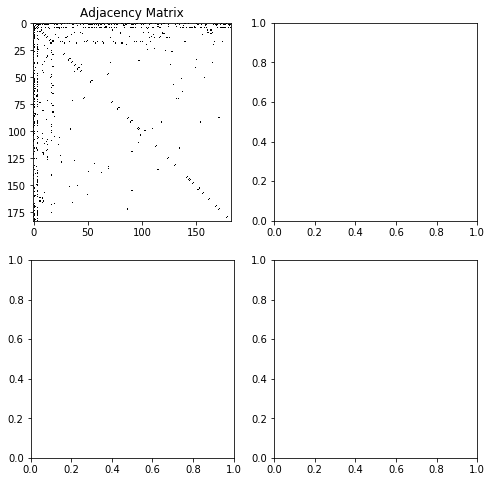

In [59]:
a = nx.to_numpy_matrix(g, dtype=int)
a = np.asarray(a)

def plotDist(a):
    
    f, ax = plt.subplots(2, 2, figsize=(8,8))
    ax[0, 0].imshow(a, cmap = 'Greys', interpolation = 'None')
    ax[0, 0].set_title('Adjacency Matrix')
    
    '''D = np.corrcoef(a)
    ax[1, 0].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 0].set_title('Correlation coeff.')'''
    
    '''dVec = spt.distance.pdist(a, metric = 'euclidean')
    D = spt.distance.squareform(dVec)
    ax[0, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[0, 1].set_title('Euclidean Dist.')'''
    
    '''dVec = spt.distance.pdist(a, metric = 'cosine')
    D = spt.distance.squareform(dVec)
    ax[1, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 1].set_title('Cosine Dist.')'''
    
plt.savefig("d:Graph Adj Matrix.png")
plotDist(a)

In [ ]:
'''import community
def detectCommunities(g):
 
    parts = community.best_partition(g)
    values = [parts.get(node) for node in g.nodes()]

    plt.axis("off")
    nx.draw_networkx(g)
    plt.savefig("detectCommunities.png")'''

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


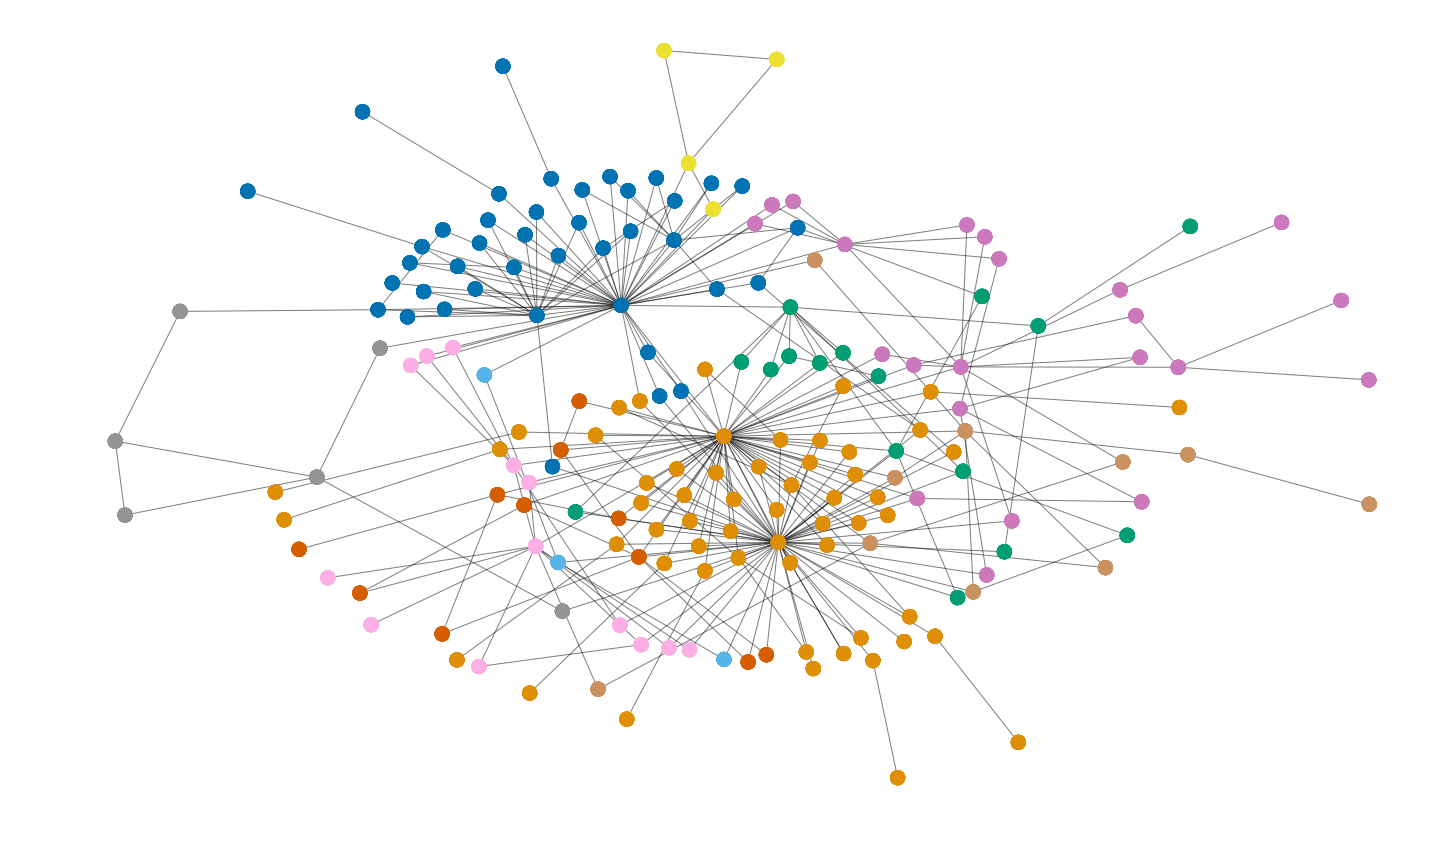

In [156]:
#برای اضافه کردن این کتابخونه به برنامه منتها باید از دستور زیر استفاده کنید
import community
partition  = community.best_partition(g)

#مشخصه اجتماع هر کدوم از گره ها رو به اون گره اضافه می کنیم
nx.set_node_attributes(g,partition,'community')
nx.set_node_attributes(g,node_colors,'colors')
#گراف رو رسم می کنیم
from seaborn import color_palette
palette = sns.color_palette("colorblind", 10)
palette = list(palette)    
plt.figure(figsize = (25,15))
pos = nx.kamada_kawai_layout(g)
# براساس اجتماع هر گره یک  رنگ به آن تخصیص می دهیم
node_colors = [ palette[i[1]] for i in g.nodes(data = 'community')]
for com in set(partition.values()) :

    nx.draw_networkx_nodes(g, pos, node_size = 200,
                                node_color = node_colors)
nx.draw_networkx_edges(g, pos, alpha=0.5)

plt.savefig('Community Detection_coloral.png')
plt.axis('off')
plt.show()

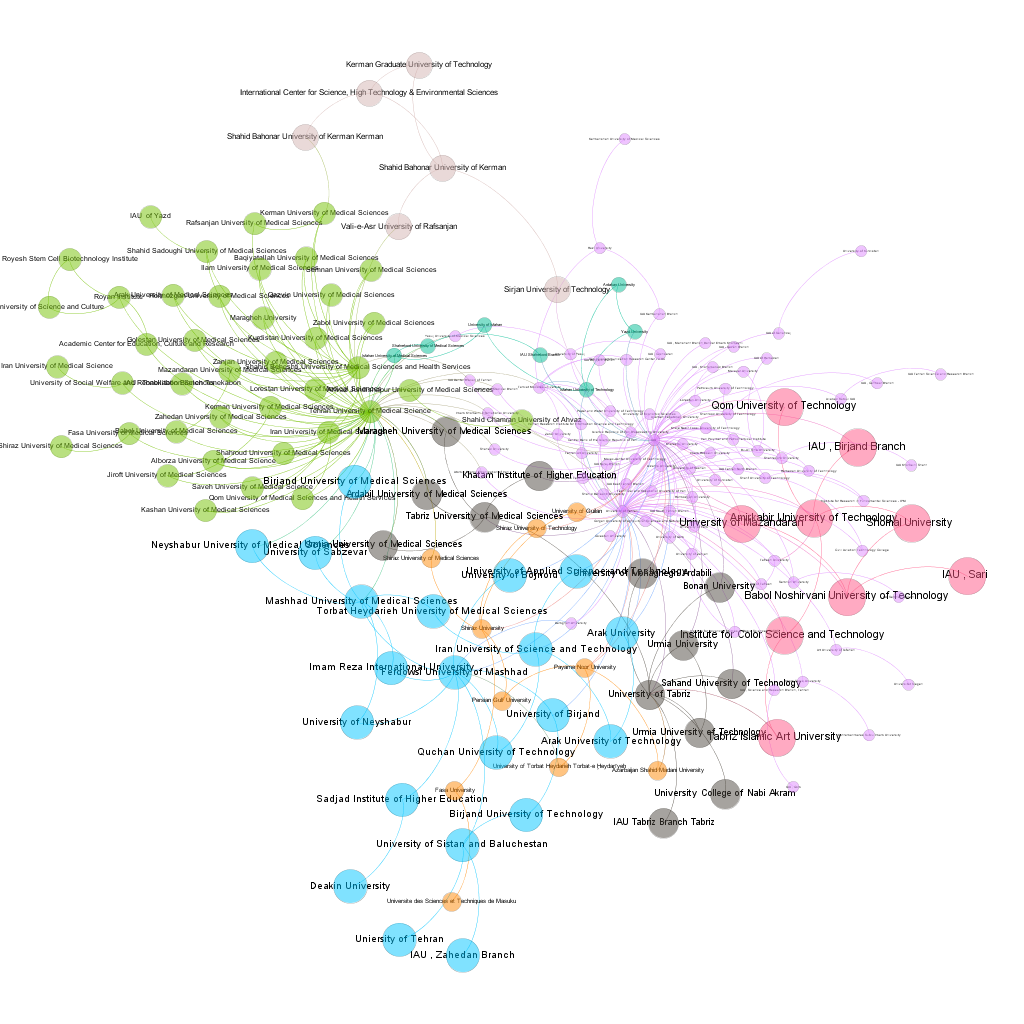

## کدام دانشگاه متعلق به کدام اجتماع است؟

In [206]:
def who_to_which(n):
    for i,j in partition.items():
        if partition[i] == n :
            print(i)
who_to_which(4)     

Iran University of Science and Technology
University of Applied Science and Technology
Ferdowsi University of Mashhad
Mashhad University of Medical Sciences
University of Sistan and Baluchestan
Uniersity of Tehran
University of Birjand
Birjand University of Technology
Birjand University of Medical Sciences
Arak University 
Arak University of Technology
Imam Reza International University
Damghan University
University of Bojnord
University of Neyshabur
Neyshabur University of Medical Sciences 
University of Sabzevar
IAU , Zahedan Branch
Quchan University of Technology
Sadjad Institute of Higher Education
Deakin University
Torbat Heydarieh University of Medical Sciences 


The pprint module provides a capability to “pretty-print” arbitrary Python data structures in a form which can be used as input to the interpreter.

In [163]:
from pprint import pprint

#یک تابع تعریف می کنیم که محتمل ترین لینک های پیشبینی شده رو  برای ما چاپ می کنه
def n_most_likely_links(pred, n = 10):
    pred_dict={}
    for s,t, p in pred:
        pred_dict[(s,t)] = p
    # دیکشنری به دست آمده رو  مرتب می کنیم تا ببینیم احتمال تشکیل کدام یک از لینک ها در شبکه بیشتره
    pprint( sorted(pred_dict.items(), key = lambda x:x[1], reverse=True)[:n]    )

# تابع زیر ضریب ژاکارد برای همه  جفت گره هایی در شبکه که با هم متصل نیستند رو محاسبه می کنه
pred_jaccard = nx.jaccard_coefficient(g)
# تبدیل به دیکشنری می کنم

n_most_likely_links(pred_jaccard)

[(('University of Kurdistan ', 'University of Kashan'), 1.0),
 (('University of Kurdistan ', 'University of Qom'), 1.0),
 (('University of Kurdistan ', 'Shahid Beheshti University'), 1.0),
 (('University of Kurdistan ', 'IAU Tehran North Branch '), 1.0),
 (('University of Kurdistan ', 'Malek-Ashtar University of Technology'), 1.0),
 (('University of Kurdistan ', 'Alzahra University'), 1.0),
 (('University of Kurdistan ', 'IAU East Tehran Branch '), 1.0),
 (('University of Kurdistan ', 'IAU South Tehran Branch '), 1.0),
 (('University of Kurdistan ',
   'Gorgan University of Agricultural Sciences and Natural Resources'),
  1.0),
 (('University of Kurdistan ', 'Imam Hossein University'), 1.0)]


In [0]:
pred_r_a = nx.resource_allocation_index(g) 
n_most_likely_links(pred_r_a)

[(('University of Tehran', 'Tarbiat Modares university'), 2.519607843137255),
 (('Tabriz University of Medical Sciences',
   'Tehran University of Medical Science'),
  1.5158730158730158),
 (('Tehran University of Medical Science', 'IAU '), 1.5158730158730158),
 (('IAU ', 'University of Tabriz'), 1.3492063492063493),
 (('IAU ', 'Tarbiat Modares university'), 1.1666666666666665),
 (('IAU ', 'Shiraz University'), 0.8492063492063492),
 (('University of Sistan and Baluchestan', 'University of Birjand'),
  0.5909090909090909),
 (('Ferdowsi University of Mashhad', 'Birjand University of Technology'),
  0.5833333333333333),
 (('University of Tehran', 'Arak University of Technology'),
  0.5333333333333333),
 (('Arak University ', 'Iran University of Science and Technology'),
  0.5158730158730158)]


In [0]:
pred_pr_at = nx.preferential_attachment(g) 
n_most_likely_links(pred_pr_at) 

[(('Tehran University of Medical Science', 'IAU '), 3366),
 (('IAU ',
   'Shahid Beheshti University of Medical Sciences and Health Services'),
  1254),
 (('University of Tehran',
   'Shahid Beheshti University of Medical Sciences and Health Services'),
  1197),
 (('IAU ', 'Tarbiat Modares university'), 792),
 (('University of Tehran', 'Tarbiat Modares university'), 756),
 (('Ferdowsi University of Mashhad', 'IAU '), 726),
 (('IAU ', 'University of Tabriz'), 726),
 (('IAU ', 'Iran University of Medical Sciences'), 660),
 (('University of Tehran', 'Iran University of Medical Sciences'), 630),
 (('Tehran University of Medical Science', 'University of Tabriz'), 561)]


In [164]:
!pip install nxviz

  Stored in directory: C:\Users\Administrator\AppData\Local\pip\Cache\wheels\74\30\b2\f2da9acb18f37b571f3c17aa03ee6f1ac555514d99d76b9af0
Successfully built sphinxcontrib-fulltoc


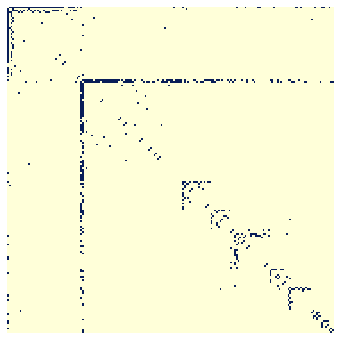

<Figure size 1584x864 with 0 Axes>

In [165]:
from nxviz import MatrixPlot
from nxviz import ArcPlot
from nxviz import CircosPlot

m = MatrixPlot(g ,node_grouping='community')
plt.figure(figsize = (22,12))
m.draw()
plt.show()

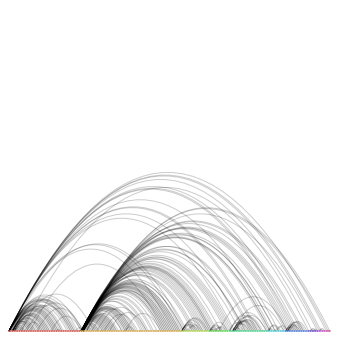

<Figure size 1584x864 with 0 Axes>

In [250]:
#رنگ و گروه هر کدام از گره در نمودار را بر اساس مشخصه اجتماع آن گره قرار می دهیم
A = ArcPlot(g, nodes_size= 22, node_color='community',node_grouping='community')
plt.figure(figsize = (22,12))
A.draw()
plt.show()

<Figure size 864x576 with 0 Axes>

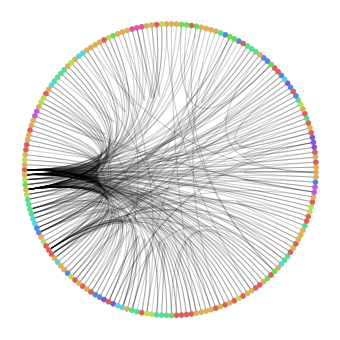

<Figure size 1584x864 with 0 Axes>

In [170]:
plt.figure(figsize = (12,8))
C= CircosPlot(g ,node_color='community',nodes_grouping='community')
plt.figure(figsize = (22,12))

C.draw()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


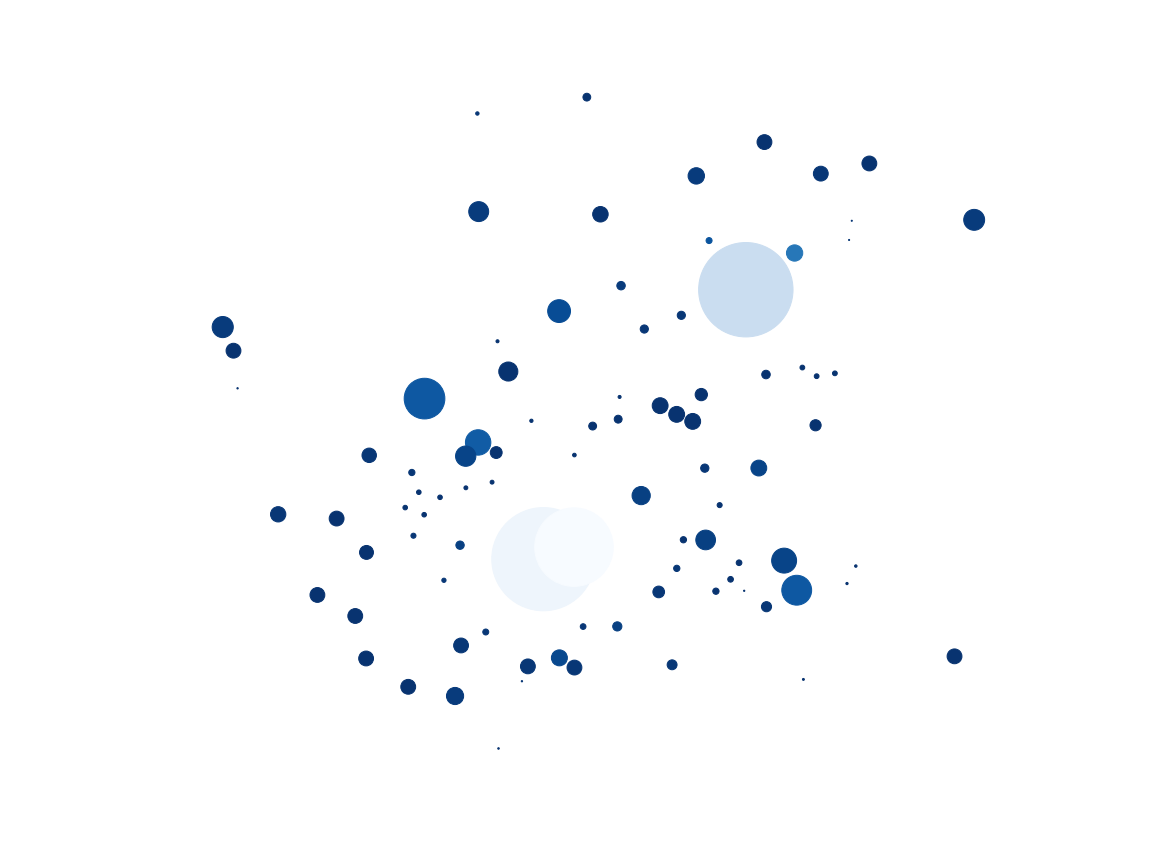

In [173]:
plt.figure(figsize = (20,15))
pos = nx.fruchterman_reingold_layout(g)
# رنگ گره ها رو بر اساس درجه هر گره تعیین می کنیم. هرچه پر رنگ تر درجه بیشتر
node_colors = [ g.degree(n) for n in g ]
#اندازه گره هایی که رسم می شوند رو بر اساس مرکزیت بینابینی قرار می دیم
node_size = [20000*nx.betweenness_centrality(g)[n] for n in g]
nx.draw_networkx(g,pos = pos,node_color=node_colors, node_size=node_size,
                 edge_color='1',alpha = 1,width = 0.8, cmap = plt.cm.Blues_r ,label_size = 12, with_labels = False)

plt.savefig('Important_Nodes.jpg', dpi= 1000)

plt.axis('off')
plt.show()


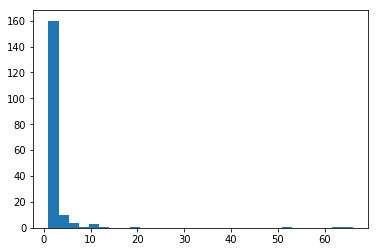

In [180]:
fb_degrees = list(dict(g.degree()).values())
plt.hist(fb_degrees, bins = 30)
#plt.axis('off')
plt.grid(False)
plt.show()


GEXF Designed to be a standard exchange format for graphs (Gephi)
nx.read_gexf
nx.write_gexf

In [295]:
nx.write_gexf(g, 'gephi.gexf')